## 1. 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import keras
from IPython.display import display
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## 2. 데이터 불러오기

In [2]:
banktest = pd.read_csv("dataset/credit_train.csv")

In [3]:
banktest.head(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [5]:
banktest.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### * 데이터 결측치 개수확인

In [6]:
banktest.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

### * 데이터 이상치 확인

#### matplotlib 설정

In [7]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

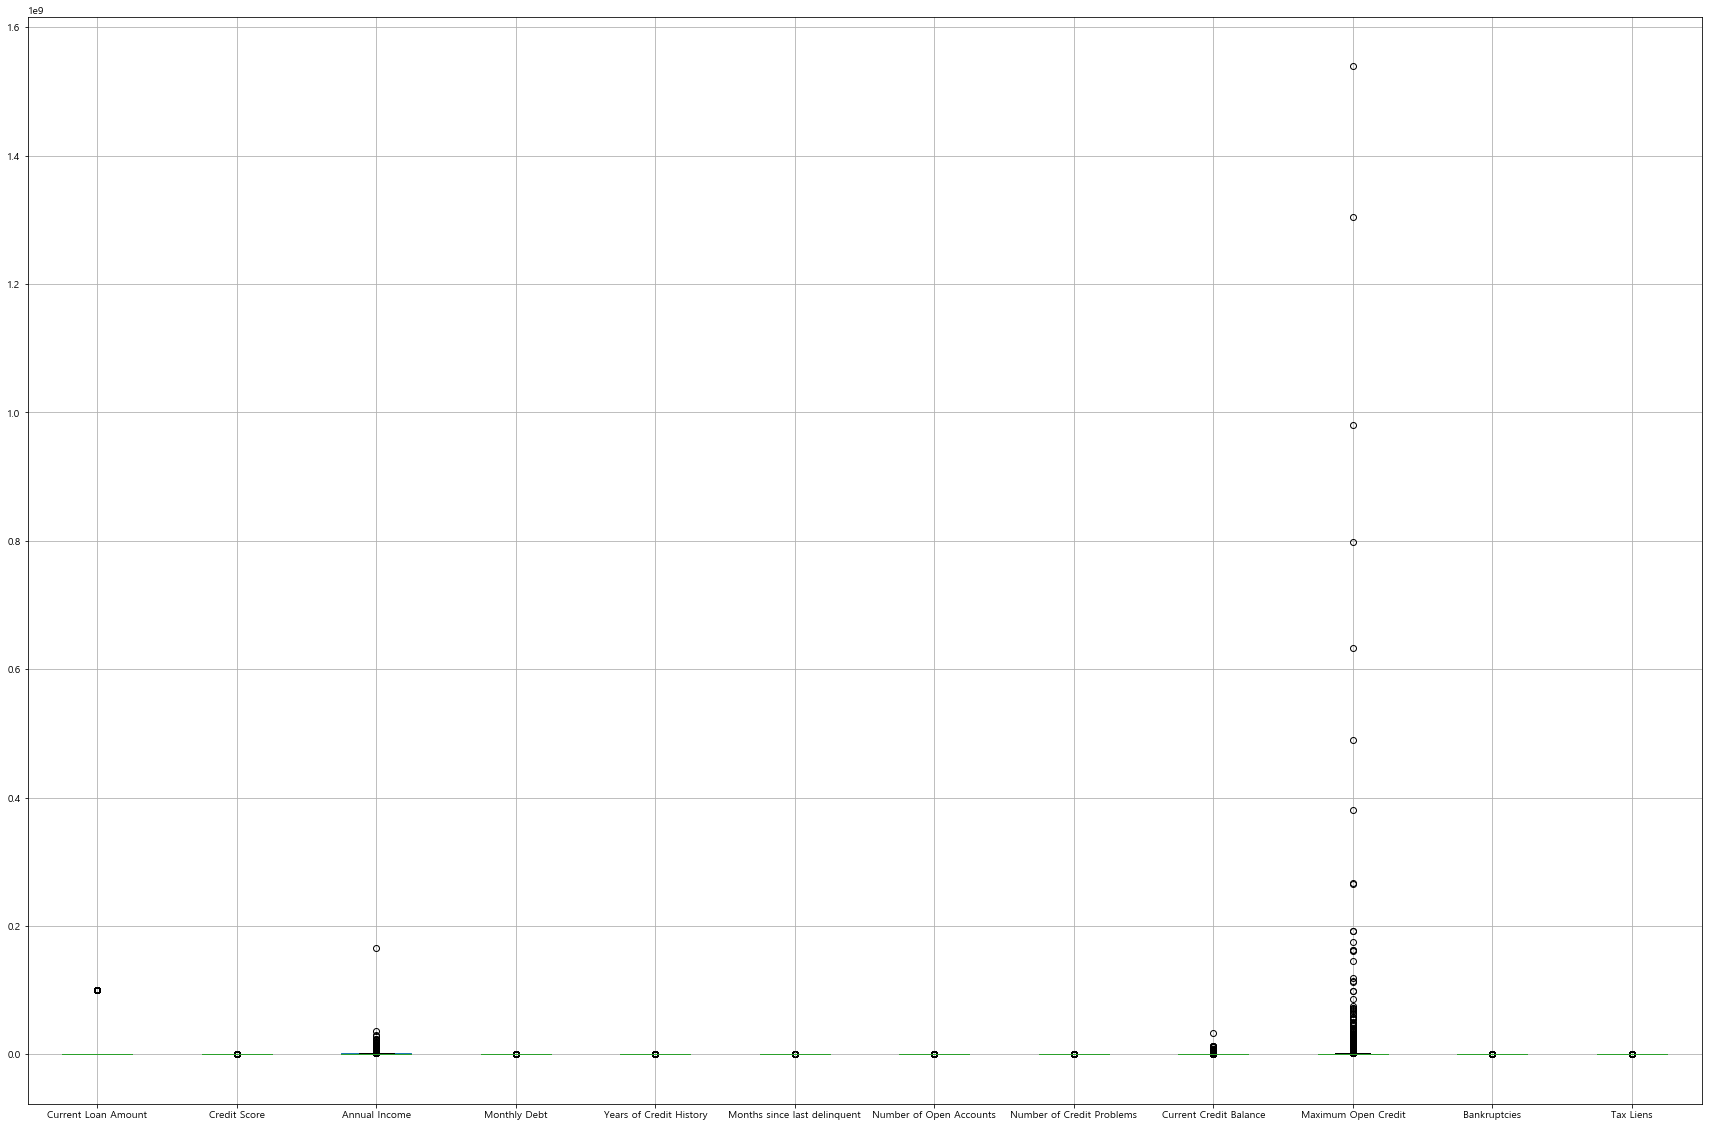

In [8]:
banktest.boxplot(figsize=(30,20))

## 3. 데이터 정제

### * 데이터 이상치 제거

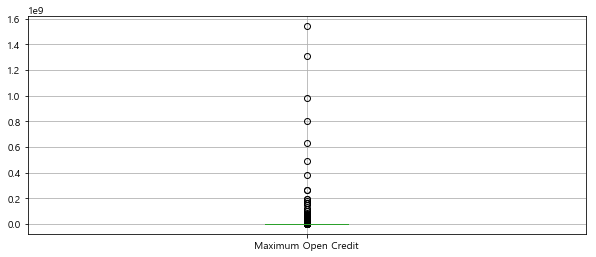

In [9]:
banktest.boxplot(column="Maximum Open Credit", figsize=(10,4))

In [10]:
banktest["Maximum Open Credit"].max()
# banktest["Maximum Open Credit"].min()

1539737892.0

#### 2737892.0 이하의 데이터의 평균값을 이상치 데이터에 대체

In [18]:
banktest["Maximum Open Credit"][banktest["Maximum Open Credit"]<2737892.0].mean()

579444.0650196645

In [20]:
banktest["Maximum Open Credit"][banktest["Maximum Open Credit"]>2737892.0]=579444.0650196645

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 결측치 제거

In [21]:
# banktest["신용점수"].isnull() = banktest["신용점수"].mean()
banktest[["Credit Score"]] = banktest[["Credit Score"]].fillna(banktest[["Credit Score"]].mean())

In [22]:
banktest[["Annual Income"]] = banktest[["Annual Income"]].fillna(banktest[["Annual Income"]].mean())

In [23]:
banktest[["Months since last delinquent"]] = banktest[["Months since last delinquent"]].fillna(banktest[["Months since last delinquent"]].mean())

In [24]:
banktest.isnull().sum()

Loan ID                          514
Customer ID                      514
Loan Status                      514
Current Loan Amount              514
Term                             514
Credit Score                       0
Annual Income                      0
Years in current job            4736
Home Ownership                   514
Purpose                          514
Monthly Debt                     514
Years of Credit History          514
Months since last delinquent       0
Number of Open Accounts          514
Number of Credit Problems        514
Current Credit Balance           514
Maximum Open Credit              516
Bankruptcies                     718
Tax Liens                        524
dtype: int64

### 정제 데이터 프레임 생성

#### * 결측치 데이터 제거

In [25]:
bankpuri = banktest.dropna(axis=0)

In [26]:
del bankpuri["Loan ID"]
del bankpuri["Customer ID"]

In [27]:
bankpuri.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

### 이산형 데이터 추출

In [29]:
df_bad_num = bankpuri.select_dtypes(exclude = "object")
df_bad_num.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,34.901321,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,34.901321,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,34.901321,15.0,0.0,253460.0,427174.0,0.0,0.0


### 범주형 데이터 추출

In [30]:
df_bad_char = bankpuri.select_dtypes(include = "object")
df_bad_char.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation


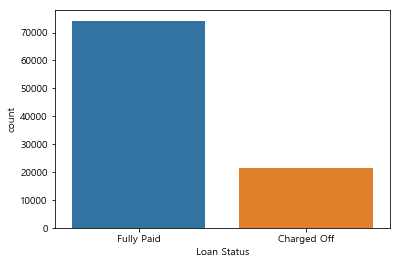

In [32]:
#df_char["대출 상태"]
sns.countplot(bankpuri["Loan Status"])

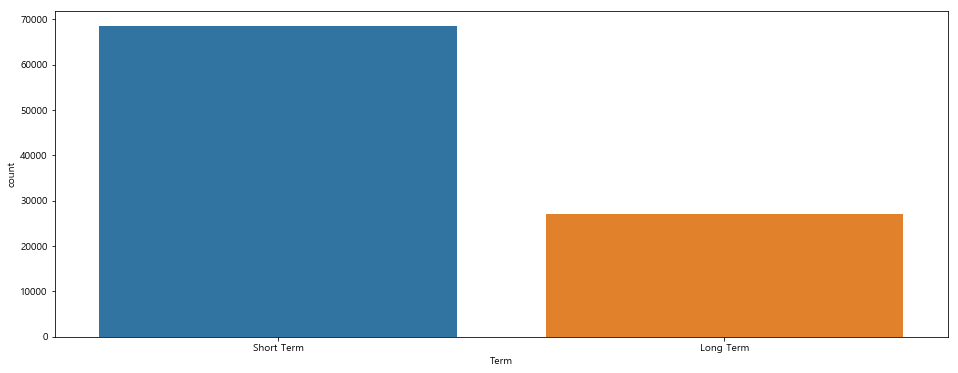

In [34]:
plt.figure(figsize=(16, 6))
sns.countplot(bankpuri["Term"])

In [31]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale
df_scale_num = scale(df_bad_num)

In [35]:
bankpuri.to_csv("dataset/credit_train_puri_eng.csv",index=False)

In [38]:
bankpuri_save = pd.read_csv("dataset/credit_train_puri_eng.csv")

In [39]:
bankpuri_save

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.901321,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.901321,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.901321,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,34.901321,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.000000,13.0,1.0,122170.0,272052.0,1.0,0.0
7,Charged Off,648714.0,Long Term,1076.456089,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.000000,15.0,0.0,193306.0,864204.0,0.0,0.0
8,Fully Paid,548746.0,Short Term,678.000000,2.559110e+06,2 years,Rent,Debt Consolidation,18660.28,22.6,33.000000,4.0,0.0,437171.0,555038.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.000000,1.454735e+06,< 1 year,Rent,Debt Consolidation,39277.75,13.9,34.901321,20.0,0.0,669560.0,1021460.0,0.0,0.0


## 4. 탐색적 분석

Text(0.5, 1.0, '고객의 대출목적')

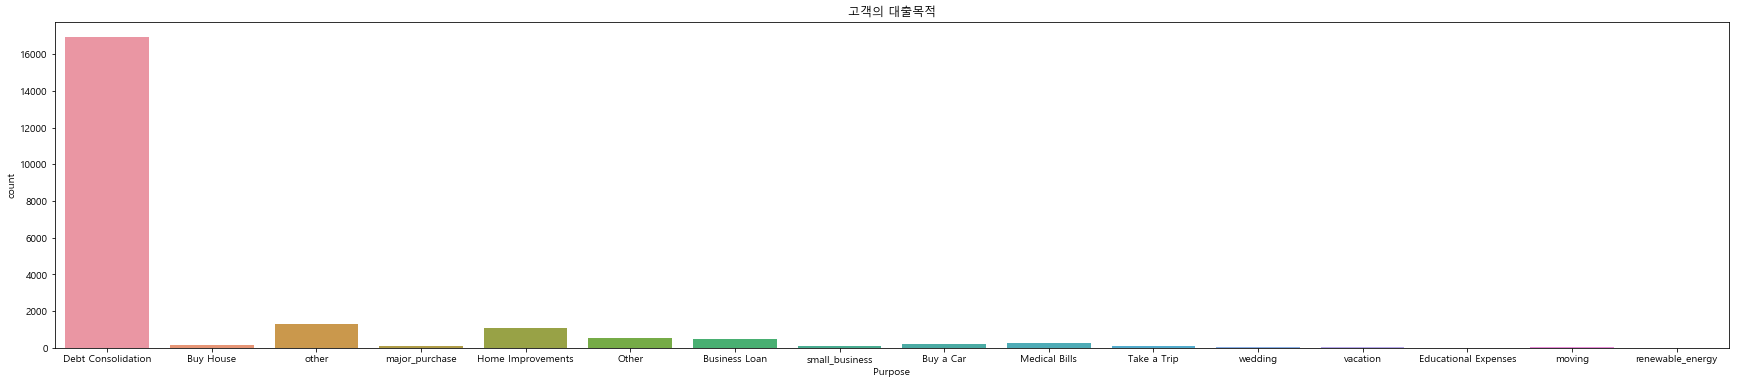

In [50]:
plt.figure(figsize=(30, 6))
sns.countplot(bankpuri_save['Purpose'][bankpuri_save["Loan Status"]=="Charged Off"])
plt.title("고객의 대출목적")

In [48]:
bankpuri_save['Purpose'].count()

95572

신용불량 고객의 대출목적의 가장1순위는 "Debt Consolidation", 2순위는 "Home Improvements" 이었다.

### 상관관계 분석

In [51]:
# 목표변수와 설명변수의 상관계수
bankpuri_save.corr(method = "pearson").round(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000,-0.095,0.013,-0.008,0.019,0.007,0.001,-0.004,0.004,0.025,-0.001,-0.003
Credit Score,-0.095,1.000,-0.015,-0.001,-0.010,-0.002,0.007,-0.002,0.000,-0.011,-0.006,0.006
Annual Income,0.013,-0.015,1.000,0.433,0.161,-0.041,0.126,-0.010,0.283,0.230,-0.038,0.040
Monthly Debt,-0.008,-0.001,0.433,1.000,0.219,-0.038,0.408,-0.049,0.482,0.386,-0.072,0.022
Years of Credit History,0.019,-0.010,0.161,0.219,1.000,-0.029,0.140,0.058,0.216,0.263,0.061,0.017
Months since last delinquent,0.007,-0.002,-0.041,-0.038,-0.029,1.000,-0.021,0.077,-0.015,-0.019,0.087,0.010
Number of Open Accounts,0.001,0.007,0.126,0.408,0.140,-0.021,1.000,-0.010,0.225,0.422,-0.018,0.006
Number of Credit Problems,-0.004,-0.002,-0.010,-0.049,0.058,0.077,-0.010,1.000,-0.110,-0.135,0.751,0.581
Current Credit Balance,0.004,0.000,0.283,0.482,0.216,-0.015,0.225,-0.110,1.000,0.454,-0.120,-0.016
Maximum Open Credit,0.025,-0.011,0.230,0.386,0.263,-0.019,0.422,-0.135,0.454,1.000,-0.146,-0.020


#### 상관관계 분석
1. Annual Income 는 Monthly Debt, Number of Open Accounts, Current Credit Balance 과 상관 관계가 있다.
2. Number of Open Accounts는 Monthly Debt, Maximum Open Credit 과 상관관계가 있다.
3. Current Credit Balance는 Monthly Debt, Maximum Open Credit 과 상관관계가 있다.

In [52]:
bankpuri_dummy = pd.get_dummies(bankpuri_save)

In [53]:
# 목표변수와 설명변수의 상관계수
bankpuri_dummy.corr(method = "pearson").round(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Current Loan Amount,1.000,-0.095,0.013,-0.008,0.019,0.007,0.001,-0.004,0.004,0.025,...,-0.001,0.006,-0.001,0.001,0.003,-0.009,-0.004,-0.004,-0.004,0.006
Credit Score,-0.095,1.000,-0.015,-0.001,-0.010,-0.002,0.007,-0.002,0.000,-0.011,...,0.000,-0.011,-0.002,0.002,0.002,-0.008,0.003,0.005,0.000,-0.007
Annual Income,0.013,-0.015,1.000,0.433,0.161,-0.041,0.126,-0.010,0.283,0.230,...,0.005,-0.005,-0.010,0.002,0.008,-0.019,0.001,0.007,-0.006,0.001
Monthly Debt,-0.008,-0.001,0.433,1.000,0.219,-0.038,0.408,-0.049,0.482,0.386,...,-0.003,-0.058,-0.017,-0.021,-0.001,-0.051,-0.002,-0.011,-0.006,-0.012
Years of Credit History,0.019,-0.010,0.161,0.219,1.000,-0.029,0.140,0.058,0.216,0.263,...,0.011,-0.032,-0.012,-0.008,-0.009,-0.019,0.014,-0.003,-0.008,-0.013
Months since last delinquent,0.007,-0.002,-0.041,-0.038,-0.029,1.000,-0.021,0.077,-0.015,-0.019,...,-0.012,-0.008,0.001,-0.003,0.002,-0.006,0.002,-0.002,0.007,0.002
Number of Open Accounts,0.001,0.007,0.126,0.408,0.140,-0.021,1.000,-0.010,0.225,0.422,...,-0.012,-0.056,-0.019,-0.020,0.001,-0.068,0.000,-0.016,-0.004,-0.012
Number of Credit Problems,-0.004,-0.002,-0.010,-0.049,0.058,0.077,-0.010,1.000,-0.110,-0.135,...,0.003,-0.013,0.005,-0.002,-0.002,0.001,-0.004,0.007,0.005,-0.008
Current Credit Balance,0.004,0.000,0.283,0.482,0.216,-0.015,0.225,-0.110,1.000,0.454,...,-0.015,-0.046,-0.020,-0.019,-0.010,-0.041,-0.000,-0.005,-0.007,-0.010
Maximum Open Credit,0.025,-0.011,0.230,0.386,0.263,-0.019,0.422,-0.135,0.454,1.000,...,-0.021,-0.041,-0.022,-0.013,-0.005,-0.064,0.001,-0.008,-0.012,-0.008


### 산점도 분석

In [ ]:
sns.pairplot(bankpuri_dummy)